**HYDRAULIC CONDUCTIVITY - MARIOTTE'S BOTTLE EXPERIMENT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

/Applications/anaconda3/envs/mude/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
k_val = []
loc = []
uncertainty = []

In [3]:
#uncertainty propagation
def k_value(time, delh):
    pi = np.pi

    # Given values
    r_bottle = 0.03  # radius of the bottle in meters
    r_soil = 0.05  # radius of the soil sample in meters
    dropdown = 0.005  # dropdown in meters
    length_soil_sample = 0.05  # length of soil sample in meters
    delh = delh  # delta h in meters
    time_dropdown = time  # time for dropdown in seconds

    # Uncertainties
    delta_r = 0.001  # uncertainty in radius (1 mm)
    delta_dropdown = 0.005  # uncertainty in dropdown (5 mm)
    delta_length = 0.001  # uncertainty in length of soil sample (1 mm)
    delta_delh = 0.001  # uncertainty in delta h (1 mm)

    # 1. Calculate areas
    A_bottle = pi * r_bottle**2
    A_soil = pi * r_soil**2

    # Uncertainty in surface area
    delta_A_bottle = 2 * pi * r_bottle * delta_r
    delta_A_soil = 2 * pi * r_soil * delta_r

    # 2. Calculate flow rate (Q)
    Q = (A_bottle * dropdown) / time_dropdown

    # Uncertainty in flow rate (Q)
    relative_uncertainty_Q = np.sqrt((delta_A_bottle / A_bottle)**2 + (delta_dropdown / dropdown)**2)
    delta_Q = Q * relative_uncertainty_Q

    # 3. Calculate hydraulic conductivity (k)
    k = (Q * length_soil_sample) / (A_soil * delh)

    # Uncertainty in hydraulic conductivity (k)
    relative_uncertainty_k = np.sqrt(
        (delta_Q / Q)**2 + 
        (delta_length / length_soil_sample)**2 + 
        (delta_A_soil / A_soil)**2 + 
        (delta_delh / delh)**2
    )
    delta_k = k * relative_uncertainty_k

    
    return Q, delta_Q, k, delta_k

S1

In [4]:
# 2 and 4
k_val.append(np.mean([k_value(time = 305, delh = 0.05)[2], k_value(time = 201, delh = 0.037)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 305, delh = 0.05)[3]**2, k_value(time = 201, delh = 0.037)[3]**2])))
loc.append("S1_L1")

In [5]:
# 6 and 8
k_val.append(np.mean([k_value(time = 189, delh = 0.04)[2], k_value(time = 60, delh = 0.03)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 189, delh = 0.04)[3]**2, k_value(time = 60, delh = 0.03)[3]**2])))
loc.append("S1_L2")

In [6]:
# 14 and 16 (missing)
k_val.append(np.mean([k_value(time = 270, delh = 0.045)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 270, delh = 0.045)[3]**2])))
loc.append("S1_L3")

In [7]:
# 17 and 20
k_val.append(np.mean([k_value(time = 195, delh = 0.04)[2], k_value(time = 199, delh = 0.04)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 195, delh = 0.04)[3]**2, k_value(time = 199, delh = 0.04)[3]**2])))
loc.append("S1_L4")

In [8]:
# 22 (missing) and 24
k_val.append(np.mean([k_value(time = 303, delh = 0.04)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 303, delh = 0.04)[3]**2])))
loc.append("S1_L5")

In [9]:
# 87 and 88 (missing)
k_val.append(np.mean([k_value(time = 183, delh = 0.04)[2], k_value(time = 199, delh = 0.04)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 183, delh = 0.04)[3]**2, k_value(time = 199, delh = 0.04)[3]**2])))
loc.append("S1_L6")

S2

In [10]:
# 26 and 28

k_val.append(np.mean([k_value(time = 1357, delh = 0.04)[2], k_value(time = 52, delh = 0.05)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 1357, delh = 0.04)[3]**2, k_value(time = 52, delh = 0.05)[3]**2])))
loc.append("S2_L1")

In [11]:
# 30 and 32
k_val.append(np.mean([k_value(time = 222, delh = 0.04)[2], k_value(time = 52, delh = 0.05)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 222, delh = 0.04)[3]**2, k_value(time = 52, delh = 0.05)[3]**2])))
loc.append("S2_L2")

In [12]:
# 34 and 36
k_val.append(np.mean([k_value(time = 257, delh = 0.06)[2], k_value(time = 356, delh = 0.06)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 257, delh = 0.06)[3]**2, k_value(time = 356, delh = 0.06)[3]**2])))
loc.append("S2_L3")

In [13]:
# 38 and 40
k_val.append(np.mean([k_value(time = 407, delh = 0.042)[2], k_value(time = 434, delh = 0.035)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 407, delh = 0.042)[3]**2, k_value(time = 434, delh = 0.035)[3]**2])))
loc.append("S2_L4")

In [14]:
# 42 and 44
k_val.append(np.mean([k_value(time = 59, delh = 0.042)[2], k_value(time = 262, delh = 0.05)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 59, delh = 0.042)[3]**2, k_value(time = 262, delh = 0.05)[3]**2])))
loc.append("S2_L5")

In [15]:
# 46 and 48
k_val.append(np.mean([k_value(time = 187, delh = 0.04)[2], k_value(time = 119, delh = 0.045)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 187, delh = 0.04)[3]**2, k_value(time = 119, delh = 0.045)[3]**2])))
loc.append("S2_L6")

S3

In [16]:
# 49 and 50
k_val.append(np.mean([k_value(time = 1907, delh = 0.04)[2], k_value(time = 782, delh = 0.042)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 1907, delh = 0.04)[3]**2, k_value(time = 782, delh = 0.042)[3]**2])))
loc.append("S3_L1")

In [17]:
# 54 and 56
k_val.append(np.mean([k_value(time = 868, delh = 0.035)[2], k_value(time = 489, delh = 0.04)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 868, delh =0.035 )[3]**2, k_value(time = 489, delh = 0.04)[3]**2])))
loc.append("S3_L2")

In [18]:
# 58 MISSING !! and 60
#k_val.append(np.mean([k_value(time = , delh = )[2], k_value(time = 823, delh = 0.037)[2]])) 
#uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = , delh = )[3]**2, k_value(time = 782, delh = 0.042)[3]**2])))
#loc.append("S3_L3")

In [19]:
# 66 and 68
k_val.append(np.mean([k_value(time = 1586, delh = 0.035)[2], k_value(time = 215, delh = 0.47)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 1586, delh = 0.035)[3]**2, k_value(time = 215, delh = 0.047)[3]**2])))
loc.append("S3_L4")

In [20]:
# 74 and 76
k_val.append(np.mean([k_value(time = 236, delh = 0.045)[2], k_value(time = 698, delh = 0.035)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 236, delh = 0.045)[3]**2, k_value(time = 698, delh = 0.035)[3]**2])))
loc.append("S3_L5")

In [21]:
# 70 and 72
k_val.append(np.mean([k_value(time = 1553, delh = 0.047)[2], k_value(time = 1543, delh = 0.036)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 1553, delh = 0.047)[3]**2, k_value(time = 1543, delh = 0.036)[3]**2])))
loc.append("S3_L6")

S4

In [22]:
# 105 and 106
k_val.append(np.mean([k_value(time = 629, delh = 0.035)[2], k_value(time = 240, delh = 0.043)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 629, delh = 0.035)[3]**2, k_value(time = 240, delh = 0.043)[3]**2])))
loc.append("S4_L2")

In [23]:
# 101 and 102
k_val.append(np.mean([k_value(time = 524, delh = 0.048)[2], k_value(time = 628, delh = 0.045)[2]]))
uncertainty.append(0.5 * np.sqrt(np.mean([k_value(time = 524, delh = 0.048)[3]**2, k_value(time = 628, delh = 0.045)[3]**2])))
loc.append("S4_L3")

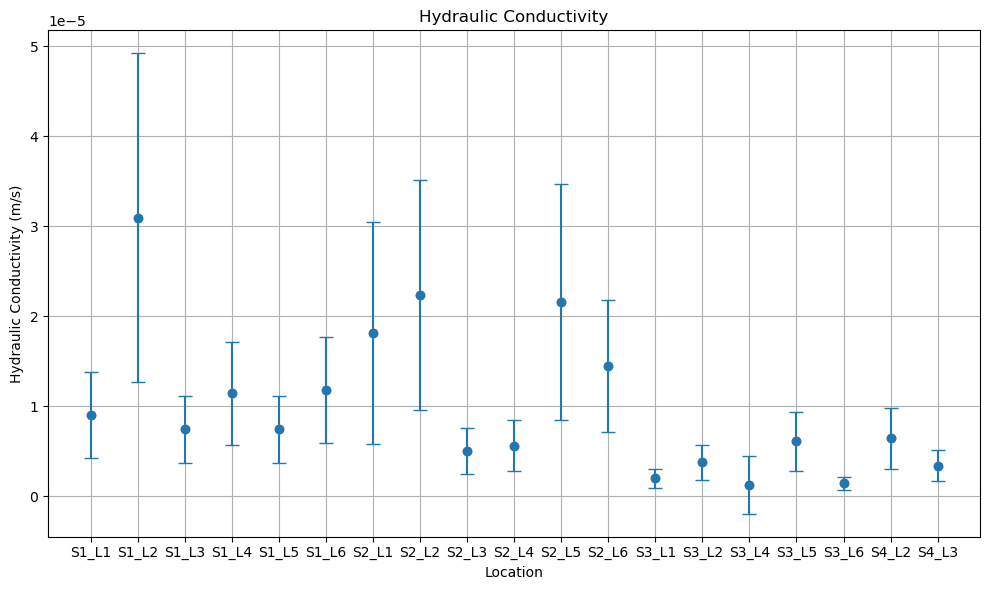

In [32]:
plt.figure(figsize=(10, 6))

plt.errorbar(loc, k_val, yerr=uncertainty, fmt='o', capsize=5, label='Hydraulic Conductivity')  # fmt='o' adds markers
plt.plot(loc, k_val, 'o')
plt.ylabel('Hydraulic Conductivity (m/s)')
plt.xlabel('Location')
#plt.yscale('log') 
plt.title('Hydraulic Conductivity')
plt.savefig("M_total", dpi = 300)

In [25]:
loc

['S1_L1',
 'S1_L2',
 'S1_L3',
 'S1_L4',
 'S1_L5',
 'S1_L6',
 'S2_L1',
 'S2_L2',
 'S2_L3',
 'S2_L4',
 'S2_L5',
 'S2_L6',
 'S3_L1',
 'S3_L2',
 'S3_L4',
 'S3_L5',
 'S3_L6',
 'S4_L2',
 'S4_L3']

In [30]:
cl = k_val[0:2] + k_val[6:8] + k_val[12:14] + k_val[18:19]
nc = k_val[3:5] + k_val[9:11] + k_val[15:17]
data = [cl, nc]
labels = ["Cleared", "Uncleared"]

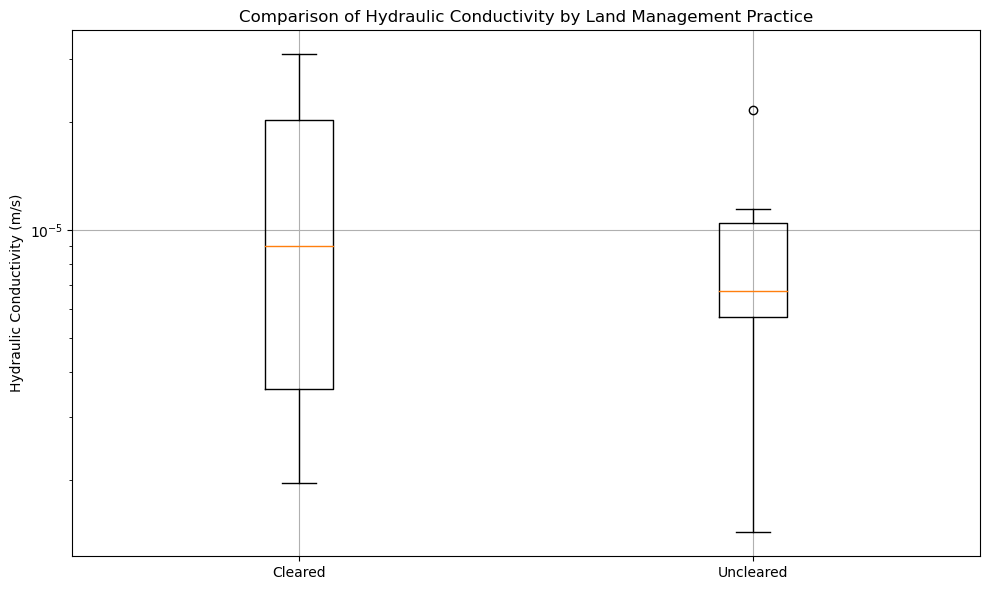

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels = labels)
plt.ylabel('Hydraulic Conductivity (m/s)')
plt.yscale("log")
plt.title('Comparison of Hydraulic Conductivity by Land Management Practice')
plt.savefig("comparison_M", dpi = 300)
plt.show()

In [28]:
print("try2")

try2
